<a href="https://colab.research.google.com/github/MinhDat13/Bai_tap_AI/blob/main/Prediction_of_rainfall_using_fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=166101e477a7d05ef3c9db13e5d0228e84d9c5017cefcfb116eae854fcec917d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


4.81764705882353


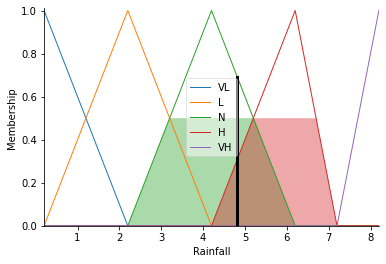

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

WS = ctrl.Antecedent(np.arange(0.7, 3.1, 0.5),'Windspeed')
TP = ctrl.Antecedent(np.arange(20.4,41.2,0.5),'Temprature')
RF = ctrl.Consequent(np.arange(0.2,9.1, 1),'Rainfall')


WS['VL'] = fuzz.trimf(WS.universe,[0.7,0.7,1.2])
WS['L'] = fuzz.trimf(WS.universe,[0.7, 1.2, 1.7])
WS['N'] = fuzz.trimf(WS.universe,[1.2, 1.7, 2.2])
WS['H'] = fuzz.trimf(WS.universe,[1.7, 2.2, 2.7])
WS['VH'] = fuzz.trimf(WS.universe,[2.7,2.7, 3.1,])

TP['VL'] = fuzz.trimf(TP.universe,[20.4,20.4,25.4])
TP['L'] = fuzz.trapmf(TP.universe,[20.4, 20.4, 25.4, 30.4])
TP['N'] = fuzz.trimf(TP.universe,[25.4, 30.4, 35.4])
TP['H'] = fuzz.trimf(TP.universe,[30.4, 35.4, 40.4])
TP['VH'] = fuzz.trimf(TP.universe,[35.4, 41.2, 41.2 ])

RF['VL'] = fuzz.trimf(RF.universe,[0.2,0.2,2.2])
RF['L'] = fuzz.trimf(RF.universe,[0.2, 2.2, 4.2])
RF['N'] = fuzz.trimf(RF.universe,[2.2, 4.2, 6.2])
RF['H'] = fuzz.trimf(RF.universe,[4.2, 6.2, 6.2])
RF['VH'] = fuzz.trimf(RF.universe,[8.2, 8.2, 9.1])

# WS.view()
# TP.view()
# RF.view()
rule1 = ctrl.Rule(WS['VL'] & TP['VL'], RF['VL'])
rule2 = ctrl.Rule(WS['L'] & TP['VL'], RF['L'])
rule3 = ctrl.Rule(WS['N'] & TP['VL'], RF['L'])
rule4 = ctrl.Rule(WS['H'] & TP['VL'], RF['L'])
rule5 = ctrl.Rule(WS['VH'] & TP['VL'], RF['H'])

rule6 = ctrl.Rule(WS['VL'] & TP['L'], RF['VL'])
rule7 = ctrl.Rule(WS['L'] & TP['L'], RF['VL'])
rule8 = ctrl.Rule(WS['N'] & TP['L'], RF['L'])
rule9 = ctrl.Rule(WS['H'] & TP['L'], RF['N'])
rule10 = ctrl.Rule(WS['VH'] & TP['L'], RF['H'])

rule11 = ctrl.Rule(WS['VL'] & TP['N'], RF['N'])
rule12 = ctrl.Rule(WS['L'] & TP['N'], RF['N'])
rule13 = ctrl.Rule(WS['N'] & TP['N'], RF['N'])
rule14 = ctrl.Rule(WS['H'] & TP['N'], RF['H'])
rule15 = ctrl.Rule(WS['VH'] & TP['N'], RF['H'])

rule16 = ctrl.Rule(WS['VL'] & TP['H'], RF['N'])
rule17 = ctrl.Rule(WS['L'] & TP['H'], RF['N'])
rule18 = ctrl.Rule(WS['N'] & TP['H'], RF['H'])
rule19 = ctrl.Rule(WS['H'] & TP['H'], RF['VH'])
rule20 = ctrl.Rule(WS['VH'] & TP['H'], RF['VH'])

rule21 = ctrl.Rule(WS['VL'] & TP['VH'], RF['N'])
rule22 = ctrl.Rule(WS['L'] & TP['VH'], RF['N'])
rule23 = ctrl.Rule(WS['N'] & TP['VH'], RF['H'])
rule24 = ctrl.Rule(WS['H'] & TP['VH'], RF['VH'])
rule25 = ctrl.Rule(WS['VH'] & TP['VH'], RF['VH'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25 ])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Windspeed'] = 1.45
tipping.input['Temprature'] = 35
tipping.compute()
print(tipping.output['Rainfall'])
RF.view(sim=tipping)